In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

#NLP
#re is regular expression
import re
#natural language tool kit
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer
#sent tokenizer breaks up sentences using punctuations 
#word tokenizer breaks up words in a sentence
from nltk import sent_tokenize, word_tokenize

#ML
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, make_scorer
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from time import time

#for text classification problems, features -> frequency of words in a document
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier


#allows interaction of code with operating system
import os
#facilities to deal with various inputs and outputs
import io
#serialization and de-serialization of data types
import pickle

In [2]:
df = pd.read_csv('/Users/localadmin/Desktop/bda datasets/cyberbullying_tweets.csv')
df.shape

(47692, 2)

In [3]:
df.head(3).T

,0,1,2
tweet_text,"In other words #katandandre, your food was cra...",Why is #aussietv so white? #MKR #theblock #ImA...,@XochitlSuckkks a classy whore? Or more red ve...
cyberbullying_type,not_cyberbullying,not_cyberbullying,not_cyberbullying


In [4]:
df[pd.notnull(df['tweet_text'])]
df.head()

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


In [5]:
pd.DataFrame(df.cyberbullying_type.unique()).values

array([['not_cyberbullying'],
       ['gender'],
       ['religion'],
       ['other_cyberbullying'],
       ['age'],
       ['ethnicity']], dtype=object)

<Axes: xlabel='cyberbullying_type'>

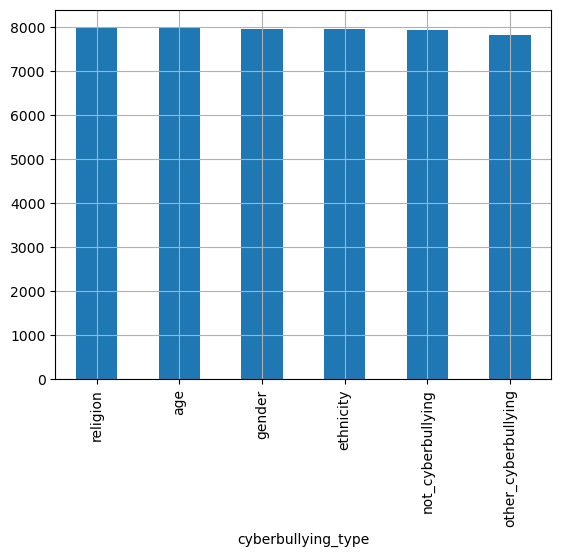

In [6]:
plt.show()
df['cyberbullying_type'].value_counts().plot(kind='bar', grid=True)

<Axes: ylabel='count'>

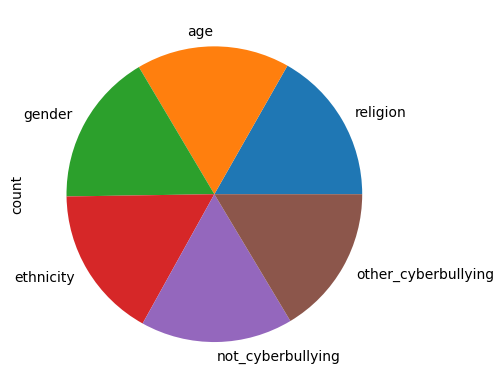

In [7]:
plt.show()
df['cyberbullying_type'].value_counts().plot(kind='pie', grid=True)

In [8]:
print(df['cyberbullying_type'].value_counts())

cyberbullying_type
religion               7998
age                    7992
gender                 7973
ethnicity              7961
not_cyberbullying      7945
other_cyberbullying    7823
Name: count, dtype: int64


In [9]:
df = df.rename(columns={'tweet_text': 'text'})
df = df.rename(columns={'cyberbullying_type':'label'})
df.head()

,text,label
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


In [10]:
df['length_beforecleaning'] = df['text'].str.len()
df.head()

,text,label,length_beforecleaning
0,"In other words #katandandre, your food was cra...",not_cyberbullying,61
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,115
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,60
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,103
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,103


In [11]:
df['lowercase']=df['text'].apply(lambda x:" ".join(word.lower() for word in x.split()))
df.head()

,text,label,length_beforecleaning,lowercase
0,"In other words #katandandre, your food was cra...",not_cyberbullying,61,"in other words #katandandre, your food was cra..."
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,115,why is #aussietv so white? #mkr #theblock #ima...
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,60,@xochitlsuckkks a classy whore? or more red ve...
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,103,"@jason_gio meh. :p thanks for the heads up, bu..."
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,103,@rudhoeenglish this is an isis account pretend...


In [12]:
df['without_username'] = df['lowercase'].replace(r'@\w+', '', regex=True)
df.head()

,text,label,length_beforecleaning,lowercase,without_username
0,"In other words #katandandre, your food was cra...",not_cyberbullying,61,"in other words #katandandre, your food was cra...","in other words #katandandre, your food was cra..."
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,115,why is #aussietv so white? #mkr #theblock #ima...,why is #aussietv so white? #mkr #theblock #ima...
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,60,@xochitlsuckkks a classy whore? or more red ve...,a classy whore? or more red velvet cupcakes?
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,103,"@jason_gio meh. :p thanks for the heads up, bu...","meh. :p thanks for the heads up, but not too ..."
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,103,@rudhoeenglish this is an isis account pretend...,this is an isis account pretending to be a ku...


In [13]:
df['without_hashtag'] = df['without_username'].replace(r'#\w+', '', regex=True)
df.head()

,text,label,length_beforecleaning,lowercase,without_username,without_hashtag
0,"In other words #katandandre, your food was cra...",not_cyberbullying,61,"in other words #katandandre, your food was cra...","in other words #katandandre, your food was cra...","in other words , your food was crapilicious!"
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,115,why is #aussietv so white? #mkr #theblock #ima...,why is #aussietv so white? #mkr #theblock #ima...,why is so white?
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,60,@xochitlsuckkks a classy whore? or more red ve...,a classy whore? or more red velvet cupcakes?,a classy whore? or more red velvet cupcakes?
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,103,"@jason_gio meh. :p thanks for the heads up, bu...","meh. :p thanks for the heads up, but not too ...","meh. :p thanks for the heads up, but not too ..."
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,103,@rudhoeenglish this is an isis account pretend...,this is an isis account pretending to be a ku...,this is an isis account pretending to be a ku...


In [14]:
df['without_url'] = df['without_hashtag'].replace(r'http\S+', '',regex=True)
df.head()

,text,label,length_beforecleaning,lowercase,without_username,without_hashtag,without_url
0,"In other words #katandandre, your food was cra...",not_cyberbullying,61,"in other words #katandandre, your food was cra...","in other words #katandandre, your food was cra...","in other words , your food was crapilicious!","in other words , your food was crapilicious!"
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,115,why is #aussietv so white? #mkr #theblock #ima...,why is #aussietv so white? #mkr #theblock #ima...,why is so white?,why is so white?
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,60,@xochitlsuckkks a classy whore? or more red ve...,a classy whore? or more red velvet cupcakes?,a classy whore? or more red velvet cupcakes?,a classy whore? or more red velvet cupcakes?
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,103,"@jason_gio meh. :p thanks for the heads up, bu...","meh. :p thanks for the heads up, but not too ...","meh. :p thanks for the heads up, but not too ...","meh. :p thanks for the heads up, but not too ..."
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,103,@rudhoeenglish this is an isis account pretend...,this is an isis account pretending to be a ku...,this is an isis account pretending to be a ku...,this is an isis account pretending to be a ku...


In [15]:
df['punctuation']=df['without_url'].str.replace('[^\w\s]','',regex=True)
df.head()

,text,label,length_beforecleaning,lowercase,without_username,without_hashtag,without_url,punctuation
0,"In other words #katandandre, your food was cra...",not_cyberbullying,61,"in other words #katandandre, your food was cra...","in other words #katandandre, your food was cra...","in other words , your food was crapilicious!","in other words , your food was crapilicious!",in other words your food was crapilicious
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,115,why is #aussietv so white? #mkr #theblock #ima...,why is #aussietv so white? #mkr #theblock #ima...,why is so white?,why is so white?,why is so white
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,60,@xochitlsuckkks a classy whore? or more red ve...,a classy whore? or more red velvet cupcakes?,a classy whore? or more red velvet cupcakes?,a classy whore? or more red velvet cupcakes?,a classy whore or more red velvet cupcakes
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,103,"@jason_gio meh. :p thanks for the heads up, bu...","meh. :p thanks for the heads up, but not too ...","meh. :p thanks for the heads up, but not too ...","meh. :p thanks for the heads up, but not too ...",meh p thanks for the heads up but not too con...
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,103,@rudhoeenglish this is an isis account pretend...,this is an isis account pretending to be a ku...,this is an isis account pretending to be a ku...,this is an isis account pretending to be a ku...,this is an isis account pretending to be a ku...


In [16]:
import pandas as pd
import re
def remove_emojis(text):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F700-\U0001F77F"  # alchemical symbols
                               u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
                               u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
                               u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
                               u"\U0001FA00-\U0001FA6F"  # Chess Symbols
                               u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
                               u"\U00002702-\U000027B0"  # Dingbats
                               u"\U000024C2-\U0001F251" 
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

# Apply the function to the 'Text' column
df['without_emoji'] = df['punctuation'].apply(remove_emojis)

In [17]:
from nltk.corpus import stopwords
stop_words = stopwords.words("english")
df['without_stopwords']=df['without_emoji'].apply(lambda x:" ".join(word for word in x.split() if word not in stop_words))
df.head()

,text,label,length_beforecleaning,lowercase,without_username,without_hashtag,without_url,punctuation,without_emoji,without_stopwords
0,"In other words #katandandre, your food was cra...",not_cyberbullying,61,"in other words #katandandre, your food was cra...","in other words #katandandre, your food was cra...","in other words , your food was crapilicious!","in other words , your food was crapilicious!",in other words your food was crapilicious,in other words your food was crapilicious,words food crapilicious
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,115,why is #aussietv so white? #mkr #theblock #ima...,why is #aussietv so white? #mkr #theblock #ima...,why is so white?,why is so white?,why is so white,why is so white,white
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,60,@xochitlsuckkks a classy whore? or more red ve...,a classy whore? or more red velvet cupcakes?,a classy whore? or more red velvet cupcakes?,a classy whore? or more red velvet cupcakes?,a classy whore or more red velvet cupcakes,a classy whore or more red velvet cupcakes,classy whore red velvet cupcakes
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,103,"@jason_gio meh. :p thanks for the heads up, bu...","meh. :p thanks for the heads up, but not too ...","meh. :p thanks for the heads up, but not too ...","meh. :p thanks for the heads up, but not too ...",meh p thanks for the heads up but not too con...,meh p thanks for the heads up but not too con...,meh p thanks heads concerned another angry dud...
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,103,@rudhoeenglish this is an isis account pretend...,this is an isis account pretending to be a ku...,this is an isis account pretending to be a ku...,this is an isis account pretending to be a ku...,this is an isis account pretending to be a ku...,this is an isis account pretending to be a ku...,isis account pretending kurdish account like i...


In [18]:
pd.Series(" ".join(df['without_stopwords']).split()).value_counts()[:50]

school       8709
like         5864
fuck         5803
dumb         5332
high         5095
people       4810
bullied      4664
im           4496
dont         4407
nigger       4299
rt           4297
rape         4223
u            4106
gay          3968
bully        3578
jokes        3460
one          3403
get          2843
girls        2833
ass          2796
girl         2709
black        2694
amp          2606
muslims      2401
know         2341
muslim       2323
white        2186
think        2129
would        2055
joke         2030
bitch        2021
idiot        1979
right        1834
say          1744
got          1730
fucking      1676
call         1676
even         1657
bullies      1647
go           1638
women        1621
cant         1618
make         1611
youre        1565
never        1527
see          1525
christian    1515
ur           1501
called       1500
shit         1498
Name: count, dtype: int64

In [19]:
other_stopwords=['im','rt','u','one','get','know','think','would','like','dont','get','go','ing','would','page','see','even','amp','say','also']
df['without_stopwords'].apply(lambda x:" ".join(word for word in x.split() if word not in other_stopwords))
df.head()

,text,label,length_beforecleaning,lowercase,without_username,without_hashtag,without_url,punctuation,without_emoji,without_stopwords
0,"In other words #katandandre, your food was cra...",not_cyberbullying,61,"in other words #katandandre, your food was cra...","in other words #katandandre, your food was cra...","in other words , your food was crapilicious!","in other words , your food was crapilicious!",in other words your food was crapilicious,in other words your food was crapilicious,words food crapilicious
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,115,why is #aussietv so white? #mkr #theblock #ima...,why is #aussietv so white? #mkr #theblock #ima...,why is so white?,why is so white?,why is so white,why is so white,white
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,60,@xochitlsuckkks a classy whore? or more red ve...,a classy whore? or more red velvet cupcakes?,a classy whore? or more red velvet cupcakes?,a classy whore? or more red velvet cupcakes?,a classy whore or more red velvet cupcakes,a classy whore or more red velvet cupcakes,classy whore red velvet cupcakes
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,103,"@jason_gio meh. :p thanks for the heads up, bu...","meh. :p thanks for the heads up, but not too ...","meh. :p thanks for the heads up, but not too ...","meh. :p thanks for the heads up, but not too ...",meh p thanks for the heads up but not too con...,meh p thanks for the heads up but not too con...,meh p thanks heads concerned another angry dud...
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,103,@rudhoeenglish this is an isis account pretend...,this is an isis account pretending to be a ku...,this is an isis account pretending to be a ku...,this is an isis account pretending to be a ku...,this is an isis account pretending to be a ku...,this is an isis account pretending to be a ku...,isis account pretending kurdish account like i...


In [20]:
word_to_remove = ['rt','meh']

# Remove the specified word from the 'TextColumn'
df['without_rt']=df['without_stopwords'].str.replace(word_to_remove, ' ')

In [23]:
df['ctext'] = df['without_rt'].replace(to_replace='\d', value='', regex=True)
df.head()

,text,label,length_beforecleaning,lowercase,without_username,without_hashtag,without_url,punctuation,without_emoji,without_stopwords,without_rt,ctext
0,"In other words #katandandre, your food was cra...",not_cyberbullying,61,"in other words #katandandre, your food was cra...","in other words #katandandre, your food was cra...","in other words , your food was crapilicious!","in other words , your food was crapilicious!",in other words your food was crapilicious,in other words your food was crapilicious,words food crapilicious,words food crapilicious,words food crapilicious
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,115,why is #aussietv so white? #mkr #theblock #ima...,why is #aussietv so white? #mkr #theblock #ima...,why is so white?,why is so white?,why is so white,why is so white,white,white,white
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,60,@xochitlsuckkks a classy whore? or more red ve...,a classy whore? or more red velvet cupcakes?,a classy whore? or more red velvet cupcakes?,a classy whore? or more red velvet cupcakes?,a classy whore or more red velvet cupcakes,a classy whore or more red velvet cupcakes,classy whore red velvet cupcakes,classy whore red velvet cupcakes,classy whore red velvet cupcakes
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,103,"@jason_gio meh. :p thanks for the heads up, bu...","meh. :p thanks for the heads up, but not too ...","meh. :p thanks for the heads up, but not too ...","meh. :p thanks for the heads up, but not too ...",meh p thanks for the heads up but not too con...,meh p thanks for the heads up but not too con...,meh p thanks heads concerned another angry dud...,meh p thanks heads concerned another angry dud...,meh p thanks heads concerned another angry dud...
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,103,@rudhoeenglish this is an isis account pretend...,this is an isis account pretending to be a ku...,this is an isis account pretending to be a ku...,this is an isis account pretending to be a ku...,this is an isis account pretending to be a ku...,this is an isis account pretending to be a ku...,isis account pretending kurdish account like i...,isis account pretending kurdish account like i...,isis account pretending kurdish account like i...


In [ ]:
df['length'] = df['without_rt'].str.len()
df.head()

In [24]:
columns_to_drop = ['text','length_beforecleaning','lowercase','without_username','without_hashtag','without_url','without_emoji','punctuation','without_stopwords','without_rt']
df = df.drop(columns=columns_to_drop)
df.head(2)

,label,ctext
0,not_cyberbullying,words food crapilicious
1,not_cyberbullying,white


In [25]:
df['label'], df['ctext'] = df['ctext'].copy(), df['label'].copy()
df.head()

,label,ctext
0,words food crapilicious,not_cyberbullying
1,white,not_cyberbullying
2,classy whore red velvet cupcakes,not_cyberbullying
3,meh p thanks heads concerned another angry dud...,not_cyberbullying
4,isis account pretending kurdish account like i...,not_cyberbullying


In [27]:
df = df.rename(columns={'label': 'cleaned_text'})
df = df.rename(columns={'ctext': 'label'})
df.head()

,cleaned_text,label
0,words food crapilicious,not_cyberbullying
1,white,not_cyberbullying
2,classy whore red velvet cupcakes,not_cyberbullying
3,meh p thanks heads concerned another angry dud...,not_cyberbullying
4,isis account pretending kurdish account like i...,not_cyberbullying


In [ ]:
# df['tokenized']=df['cleaned_text'].apply(lambda x: word_tokenize(str(x)))
# df.head()

In [28]:
import pandas as pd
import nltk
from nltk.stem import WordNetLemmatizer
lemmatizer = nltk.stem.WordNetLemmatizer()

df['LemmatizedSentences'] = df['cleaned_text'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in nltk.word_tokenize(x)]))

In [29]:
df.head()

,cleaned_text,label,LemmatizedSentences
0,words food crapilicious,not_cyberbullying,word food crapilicious
1,white,not_cyberbullying,white
2,classy whore red velvet cupcakes,not_cyberbullying,classy whore red velvet cupcake
3,meh p thanks heads concerned another angry dud...,not_cyberbullying,meh p thanks head concerned another angry dude...
4,isis account pretending kurdish account like i...,not_cyberbullying,isi account pretending kurdish account like is...


In [30]:
df['cleaned_text'], df['LemmatizedSentences'] = df['LemmatizedSentences'].copy(), df['cleaned_text'].copy()
df.head()

,cleaned_text,label,LemmatizedSentences
0,word food crapilicious,not_cyberbullying,words food crapilicious
1,white,not_cyberbullying,white
2,classy whore red velvet cupcake,not_cyberbullying,classy whore red velvet cupcakes
3,meh p thanks head concerned another angry dude...,not_cyberbullying,meh p thanks heads concerned another angry dud...
4,isi account pretending kurdish account like is...,not_cyberbullying,isis account pretending kurdish account like i...


In [32]:
columns_to_drop_new = ['LemmatizedSentences']
df = df.drop(columns=columns_to_drop_new)
df.head(2)

,cleaned_text,label
0,word food crapilicious,not_cyberbullying
1,white,not_cyberbullying


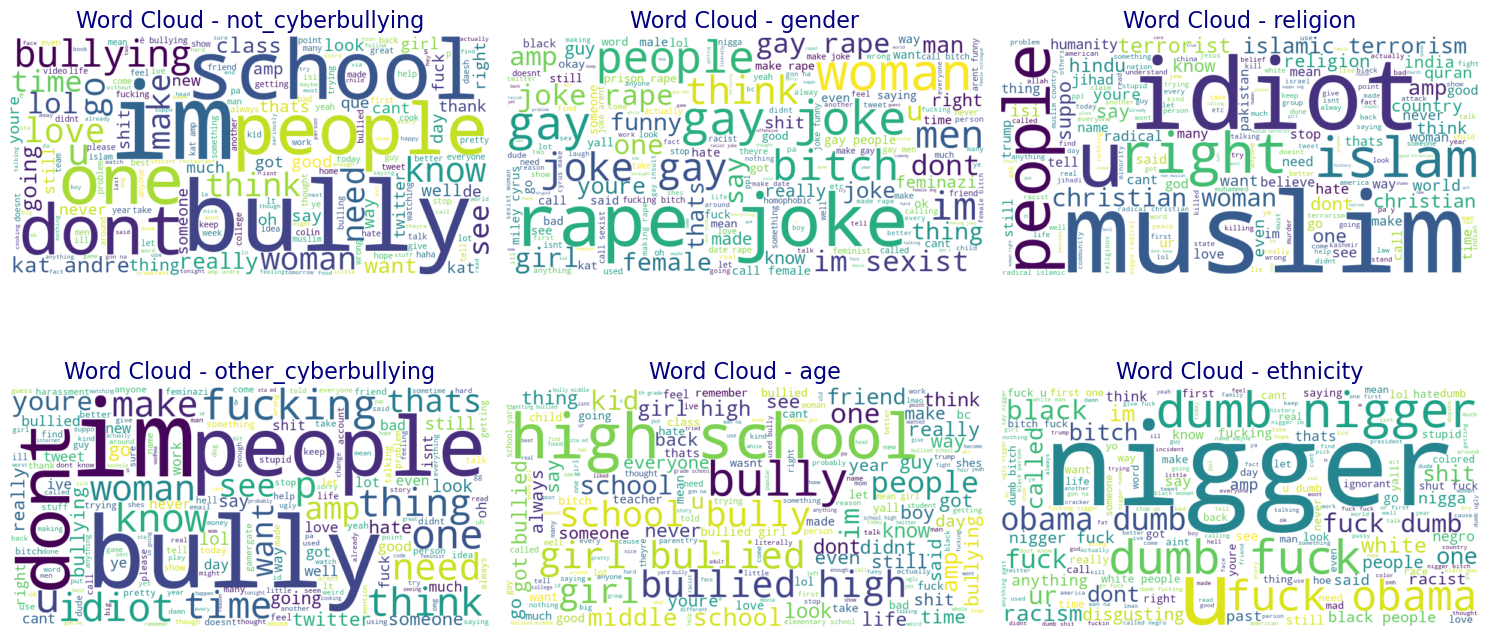

In [33]:
from wordcloud import WordCloud
categories = df['label'].unique()
plt.figure(figsize=(15, 8))
for i, category in enumerate(categories):
    text = df[df['label'] == category]['cleaned_text'].str.cat(sep=' ')
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.subplot(2, 3, i+1)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud - {category}', fontsize=16, color='navy')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [34]:
df.to_csv('cleaned_multiclass_dataset_final.csv', index=False)

/var/folders/yy/w_zhskrd2tsfcth5m01v198w0000gn/T/ipykernel_25469/3930175488.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  ax = sns.barplot(


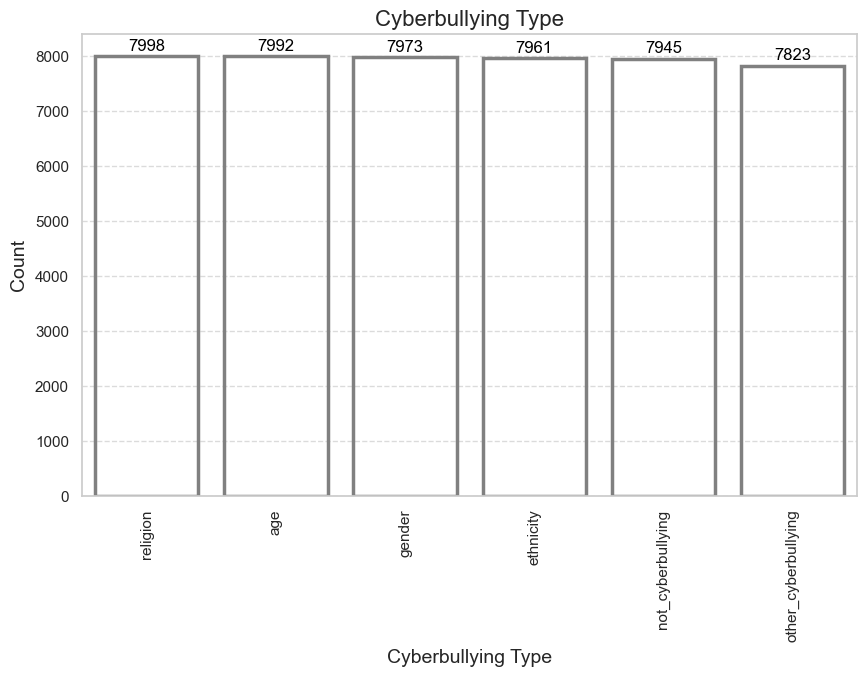

In [35]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
colors = sns.color_palette("pastel")
ax = sns.barplot(
    x=df['label'].value_counts().index,
    y=df['label'].value_counts().values,
    ci="sd",
    capsize=.4,
    errcolor=".5",
    errwidth=2.5,
    linewidth=2.5,
    edgecolor=".5",
    facecolor=(0, 0, 0, 0),
    palette=colors
)

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title("Cyberbullying Type", {'fontsize': 16})

for i, v in enumerate(df['label'].value_counts().values):
    ax.text(i, v + 50, str(v), color='black', ha='center', va='bottom')

ax.set_xlabel("Cyberbullying Type", labelpad=5, fontsize=14)
ax.set_ylabel("Count", labelpad=5, fontsize=14)
ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [36]:
class_labels = {
    'not_cyberbullying':0,
    'religion':1,
    'age':2,
    'gender':3,
    'ethnicity':4,
    'other_cyberbullying':5
}
df['label'] = df['label'].replace(class_labels).astype(int)
df['label'].value_counts()
df.head()

,cleaned_text,label
0,word food crapilicious,0
1,white,0
2,classy whore red velvet cupcake,0
3,meh p thanks head concerned another angry dude...,0
4,isi account pretending kurdish account like is...,0
